# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [25]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [50]:
imagen = imread('data/foto_clase.PNG')[:,:,:3]

Muestra la imagen para ver que se ha cargado bien

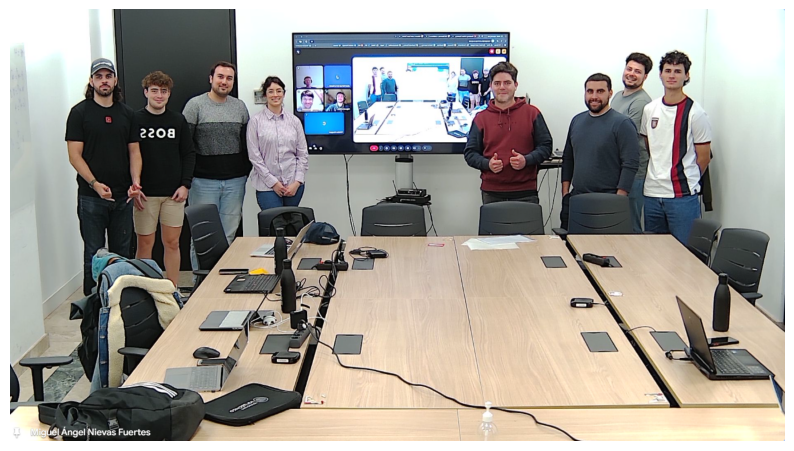

In [51]:
plt.figure(figsize=(10, 6))
plt.imshow(imagen)
plt.axis('off')
plt.show()

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [52]:
height, width, channels = imagen.shape
pixeles = imagen.reshape(-1, channels)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [86]:
n_colors = 20

In [87]:
kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=42)
kmeans.fit(pixeles)

KMeans(n_clusters=20, n_init=10, random_state=42)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [88]:
imagen_seg = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [89]:
imagen_seg = imagen_seg.reshape(imagen.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

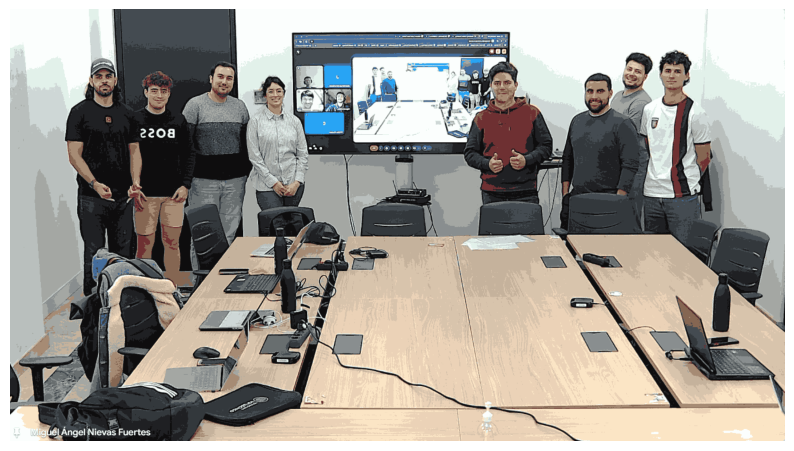

In [90]:
plt.figure(figsize=(10, 6))
plt.imshow(imagen_seg)
plt.axis('off')
plt.show()

In [92]:
plt.imsave('data/foto_clase_reducida.png', imagen_seg)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [ ]:
def menos_colores(ruta = str, n_colores = 8, guardar = False, mostrar = True):
    """
    Reduce el número de colores en una imagen usando K-means.
    
    Parámetros:
    - ruta: ruta a la imagen
    - n_colors: número de colores para la imagen de salida
    - guardar: si es True, guarda la imagen resultante
    - mostrar: si es True, muestra las imágenes original y resultante
    """
    # Leer la imagen
    imagen = imread(ruta)[:,:,:3]
    height, width, channels = imagen.shape
    
    if mostrar:
        plt.figure(figsize=(10, 6))
        plt.imshow(imagen)
        plt.title("Imagen original")
        plt.axis('off')
        plt.show()
    
    # Reformar la imagen
    pixels = imagen.reshape(-1, channels)
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_colores, n_init=10, random_state=42)
    kmeans.fit(pixeles)
    
    # Crear nueva imagen
    imagen_seg = kmeans.cluster_centers_[kmeans.labels_]
    imagen_seg = imagen_seg.reshape(imagen.shape)
    
    if mostrar:
        plt.figure(figsize=(10, 6))
        plt.imshow(imagen_seg)
        plt.title(f"Imagen con {n_colores} colores")
        plt.axis('off')
        plt.show()
    
    if guardar:
        output_path = ruta.replace('.', f'_{n_colores}colors.')
        plt.imsave(output_path, imagen_seg)
        print(f"Imagen guardada como: {output_path}")
    
    return imagen_seg

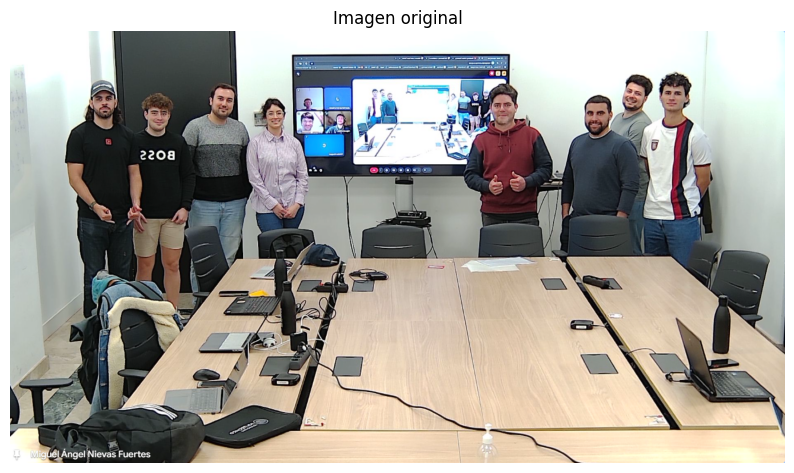

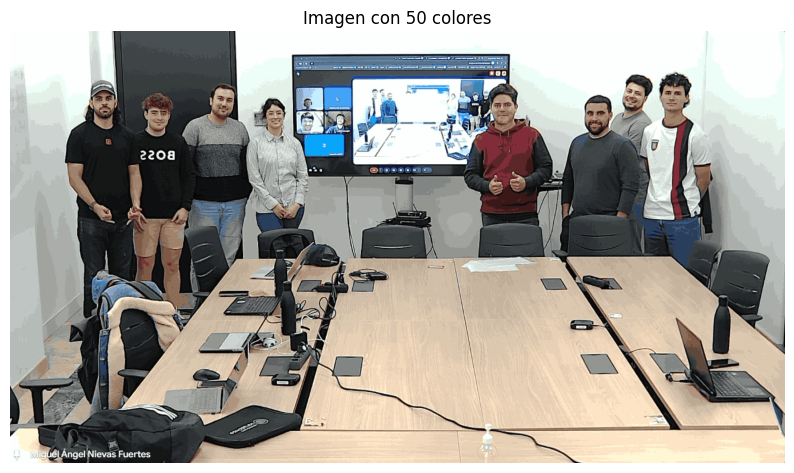

array([[[0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        ...,
        [0.76945144, 0.9305092 , 0.9935533 ],
        [0.63879097, 0.79167926, 0.93015826],
        [0.63879097, 0.79167926, 0.93015826]],

       [[0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        ...,
        [0.93156123, 0.99279654, 0.97001004],
        [0.76945144, 0.9305092 , 0.9935533 ],
        [0.63879097, 0.79167926, 0.93015826]],

       [[0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        ...,
        [0.93156123, 0.99279654, 0.97001004],
        [0.93156123, 0.99279654, 0.97001004],
        [0.76945144, 0.9305092 , 0.9935533 ]],

       ...,

       [[0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0.9989424 , 0.9979507 ],
        [0.9932447 , 0

In [104]:
menos_colores(ruta = 'data/foto_clase.png', n_colores = 50)